# Notebook sur l'article de May et Nowak
Le jeu avec des paramètres personnalisables se trouve à la fin du notebook.  

Valeur des différentes couleurs :
- Noir : 0 = C ( ou C->C )
- Jaune : 1 = D ( ou D->D )
- Orange : 2 = C->D
- Violet : 3 = D->C

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
colors = ['black', 'lightyellow', 'orange', 'purple']

Text(0.5, 1.0, 'Couleurs des différentes stratégies')

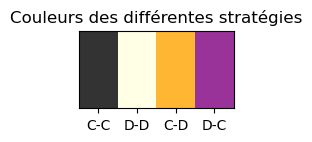

In [3]:
# Illustration des couleurs des différentes stratégies

griid = [[0,1,2,3],[0,1,2,3]]

[m,n] = np.shape(griid)

color_matrix = np.zeros((m, n, 3), dtype=np.float32)

for i in range(m):
    for j in range(n):
        color_matrix[i][j] = plt.matplotlib.colors.to_rgb(colors[griid[i][j]])

plt.figure(figsize=(2, 2))
labels = ['C-C', 'D-D', 'C-D', 'D-C']
plt.imshow(color_matrix, alpha=0.8)
plt.xticks(np.arange(n), labels)
plt.yticks(np.arange(m), [])
plt.tick_params(left=False)
plt.title("Couleurs des différentes stratégies")

### Affichage de la matrice des joueurs, en couleur

In [4]:
def draw(gridToDraw, drawSize, title) :
    """
    Dessin de la grille donnée.
    """
    coloredGridToDraw = getGridColors(gridToDraw)

    plt.figure(figsize=(drawSize, drawSize))
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.imshow(coloredGridToDraw, alpha=0.8)
    plt.title(title)

In [5]:
def getGridColors(gridToDraw) :
    """
    Mise en place des couleurs à dessiner pour la grille donnée.
    """
    [m,n] = np.shape(gridToDraw)
    coloredGrid = np.zeros((m, n, 3), dtype=np.float32)
    
    for i in range(m):
        for j in range(n):
            coloredGrid[i][j] = plt.matplotlib.colors.to_rgb(colors[gridToDraw[i][j]])
            
    return coloredGrid

### Initialisation des grilles (Joueurs et Scores)

Il existe deux grilles, une contenant les joueurs (représentés par leur stratégie) et une de score, permettant de calculer la future stratégie de chaque joueur.

In [6]:
def initializeGrid(gridSize, kaleidoscope) :
    """
    Initialisation des joueurs sur la grille de jeu 
    dépendant d'une taille donnée. Les joueurs sont 
    placés avec un pourcentage de 90% pour les C.
    """
    grid = []
    line = []

    for i in range(gridSize) :
        line = []
        for j in range(gridSize) :
            if kaleidoscope == 1 :
                cell = 0
            else :
                cell = np.random.choice(np.arange(0, 2), p=[0.9, 0.1])
            line.append(cell)
        grid.append(line)

    if kaleidoscope == 1 :
        halfSize = int((gridSize-1)/2)
        grid[halfSize][halfSize] = 1
    return grid

In [7]:
def initializeScoreGrid(gridSize) :
    """
    Initialisation de la grille des scores à la taille donnée.
    """
    scoreGrid = []
    line = []
    
    for i in range(gridSize) :
        line = []
        for j in range(gridSize) :
            line.append(0)
        scoreGrid.append(line)
    
    return scoreGrid

### Confrontation des joueurs et application de leur nouvelle stratégie

In [8]:
def confrontation(player, opponent) :
    """
    Confrontation entre deux joueurs en appliquant la matrice des récompenses.
    """
    if (player == 0 and (opponent == 0 or opponent == 3)) or (player == 3 and (opponent == 0 or opponent == 3)) :
        return 1
    elif (player == 1 and (opponent == 0 or opponent == 3)) or (player == 2 and (opponent == 0 or opponent == 3)) :
        return b
    return 0

In [9]:
def chooseNextStrategy(player, opponent) :
    """
    Définition de la couleur que prend la case au tour suivant en fonction de sa valeur précédent et sa nouvelle valeur.
    """
    if (player == 0 and (opponent == 0 or opponent == 3)) or (player == 3 and (opponent == 0 or opponent == 3)) :
        return 0 # C-C
    elif (player == 1 and (opponent == 1 or opponent == 2)) or (player == 2 and (opponent == 1 or opponent == 2)) :
        return 1 # D-D
    elif (player == 0 and (opponent == 1 or opponent == 2)) or (player == 3 and (opponent == 1 or opponent == 2)) :
        return 2 # C-D
    elif (player == 1 and (opponent == 0 or opponent == 3)) or (player == 2 and (opponent == 0 or opponent == 3)) :
        return 3 # D-C
    return -1

### Création des différentes grilles (joueurs, scores, finies et infinies)

In [10]:
def createScoreGridInfinite(grid, gridSize) :
    """
    Création de la grille des scores en parcourant toute la grille et, pour chaque joueur, 
    réaliser une confrontation avec ses 8 voisins ainsi que lui-même.
    
    Le plateau est infini. Le joueur le plus à gauche sera la voisin du joueur le plus à droite sur la même ligne
    par exemple.
    """
    scoreGrid = initializeScoreGrid(gridSize)

    for i in range(gridSize):
        for j in range(gridSize):
            playerStrategy = grid[i][j]
            for k in range(-1,2):
                for l in range(-1,2):
                    tmpLine = i + k
                    tmpCol = j + l
                    if i + k > len(grid) - 1:
                        tmpLine = 0
                    elif i + k < 0:
                        tmpLine = len(grid) - 1 
                    if j + l > len(grid[i]) - 1:
                        tmpCol = 0
                    elif j + l < 0:
                        tmpCol = len(grid[i]) - 1
                    scoreGrid[i][j] += confrontation(playerStrategy, grid[tmpLine][tmpCol])
    return scoreGrid

def createScoreGridFinite(grid, gridSize) :
    """
    Création de la grille des scores en parcourant toute la grille et, pour chaque joueur, 
    réaliser une confrontation avec ses 8 voisins ainsi que lui-même.
    
    Le plateau est fini, un joueur au bord n'aura que 5 voisins et un dans un coin n'en aura que trois.
    """
    scoreGrid = initializeScoreGrid(gridSize)

    for i in range(gridSize):
        for j in range(gridSize):
            playerStrategy = grid[i][j]
            for k in range(-1,2):
                for l in range(-1,2):
                    try :
                        tmpLine = i + k
                        tmpCol = j + l
                        if tmpLine == -1 or tmpCol == -1 or tmpLine == gridSize or tmpCol == gridSize :
                            raise IndexError
                        scoreGrid[i][j] += confrontation(playerStrategy, grid[tmpLine][tmpCol])
                    except IndexError :
                        continue
    return scoreGrid

In [11]:
def createNewGridInfinite(grid, scoreGrid, gridSize) :
    """
    Création de la grille du tour suivant en prenant en compte la grille des scores. Le joueur prend la stratégie 
    de son voisin ayant eu le score maximale.
    
    Le plateau est infini. Le joueur le plus à gauche sera la voisin du joueur le plus à droite sur la même ligne
    par exemple.
    """
    opponentScore = 0
    mlist = list()
    tmpGrid = initializeScoreGrid(gridSize)

    for i in range(gridSize) :
        for j in range(gridSize) :
            mlist = list()
            playerScore = scoreGrid[i][j]
            for k in range(-1,2) :
                for l in range(-1,2) :
                    tmpLine = i + k
                    tmpCol = j + l
                    if i + k > len(grid) - 1 :
                        tmpLine = 0
                    elif i + k < 0:
                        tmpLine = len(grid) - 1 
                    if j + l > len(grid[i]) - 1 :
                        tmpCol = 0
                    elif j + l < 0 :
                        tmpCol = len(grid[i]) - 1
                    opponentScore = scoreGrid[tmpLine][tmpCol]
                    mlist.append((tmpLine, tmpCol, opponentScore))
            mmax = max(mlist, key=lambda truple:truple[2])
            tmpGrid[i][j] = chooseNextStrategy(grid[i][j], grid[mmax[0]][mmax[1]])
    return tmpGrid

def createNewGridFinite(grid, scoreGrid, gridSize) :
    """
    Création de la grille du tour suivant en prenant en compte la grille des scores. Le joueur prend la stratégie 
    de son voisin ayant eu le score maximale.
    
    Le plateau est fini, un joueur au bord n'aura que 5 voisins et un dans un coin n'en aura que trois.
    """
    opponentScore = 0
    mlist = list()
    tmpGrid = initializeScoreGrid(gridSize)

    for i in range(gridSize) :
        for j in range(gridSize) :
            mlist = list()
            playerScore = scoreGrid[i][j]
            for k in range(-1,2) :
                for l in range(-1,2) :
                    try :
                        tmpLine = i + k
                        tmpCol = j + l
                        if tmpLine == -1 or tmpCol == -1 or tmpLine == gridSize or tmpCol == gridSize:
                            raise IndexError
                        opponentScore = scoreGrid[tmpLine][tmpCol]
                        mlist.append((tmpLine, tmpCol, opponentScore))
                    except IndexError :
                        continue
            mmax = max(mlist, key=lambda truple:truple[2])
            tmpGrid[i][j] = chooseNextStrategy(grid[i][j], grid[mmax[0]][mmax[1]])
    return tmpGrid

### Déroulement du jeu

In [12]:
def jeu(nbrTour, firstStep, drawSize, infinite, kaleidoscope) :
    """
    Déroulement du jeu.
    Initialisation de la grille initiale puis sur un nombre de tour donné, création de la grille de score puis création
    de la grille du tour actuel et dessin de celle-ci.
    """
    grid = []
    scoreGrid = []
    
    grid = initializeGrid(size, kaleidoscope)
    draw(grid, drawSize, "Grille initiale")
    nbrTourTotal = nbrTour
    
    while(nbrTour) :
        realStepNumber = nbrTourTotal - nbrTour + 1
        
        if (infinite == 0) :
            scoreGrid = createScoreGridFinite(grid, size)
            tmpGrid = createNewGridFinite(grid, scoreGrid, size)
        elif (infinite == 1) :
            scoreGrid = createScoreGridInfinite(grid, size)
            tmpGrid = createNewGridInfinite(grid, scoreGrid, size)
        grid = copy.deepcopy(tmpGrid)
        if firstStep <= realStepNumber :
            draw(grid, drawSize, "Tour " + str(realStepNumber))
        nbrTour -= 1

## Lancement du jeu
Penser à exécuter toutes les cellules précédentes avant de lancer celle ci-dessous.  
Configurer les paramètres ci-dessous (ou laisser par défaut) avant d'exécuter la cellule.

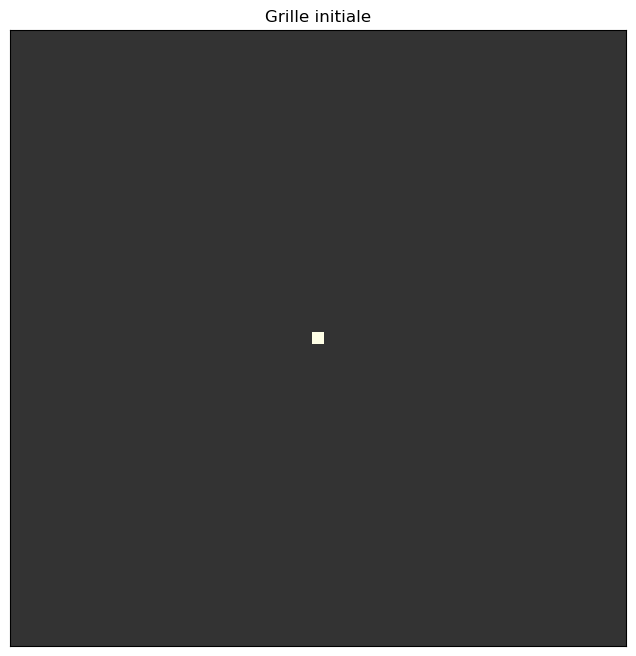

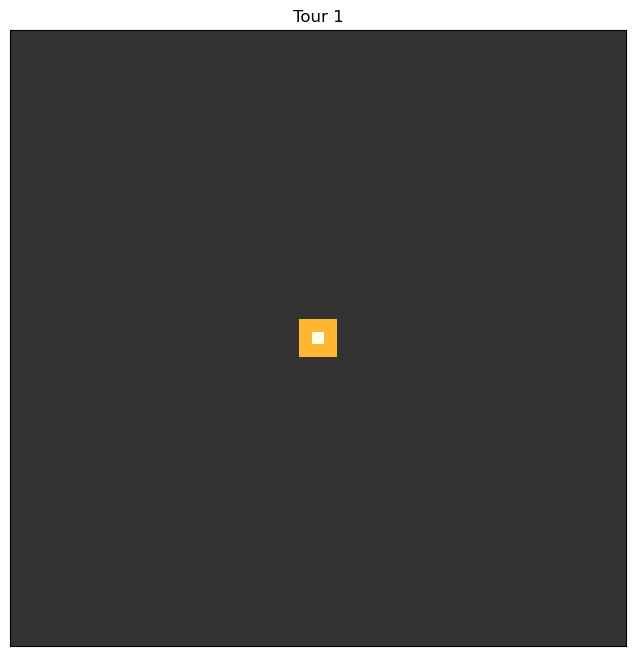

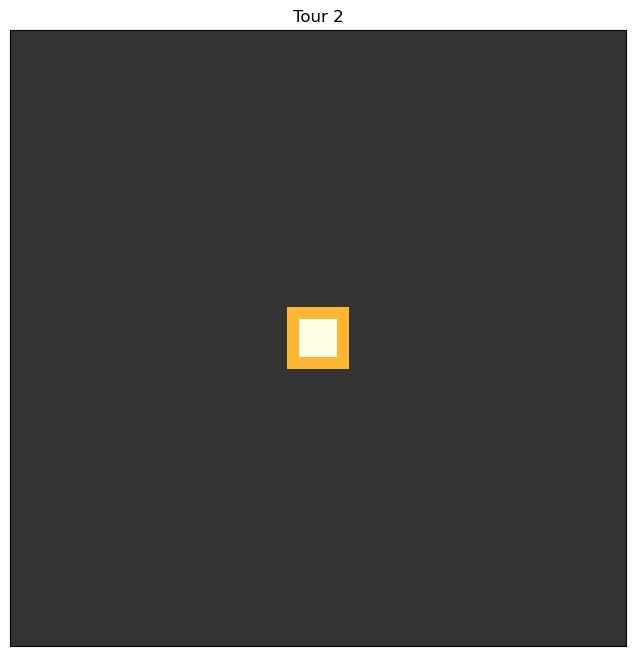

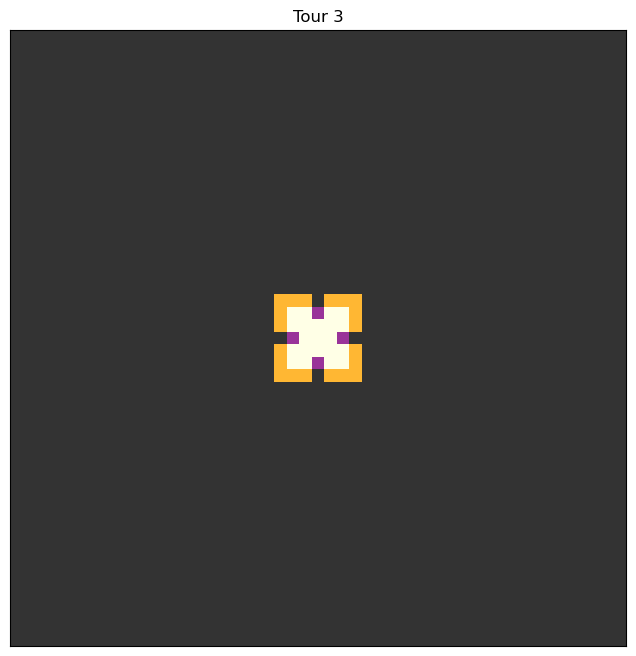

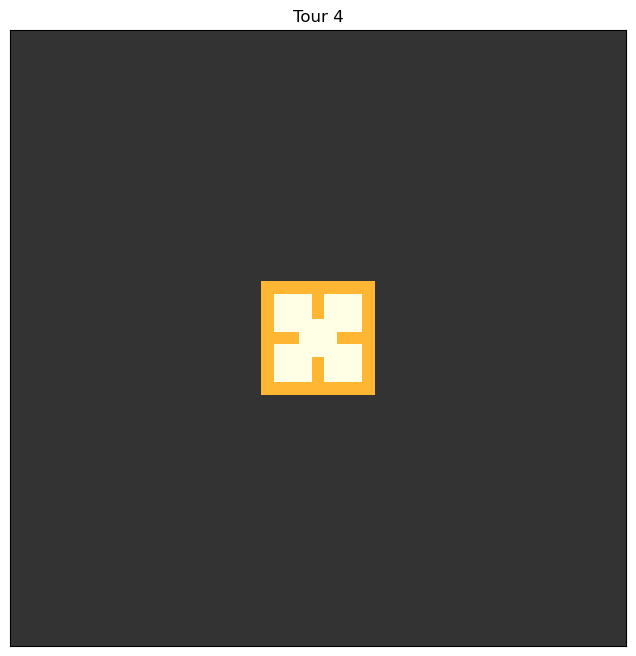

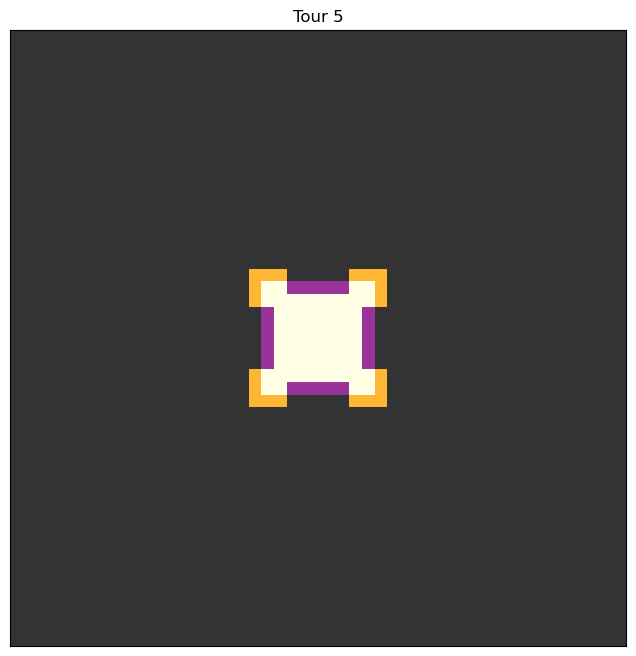

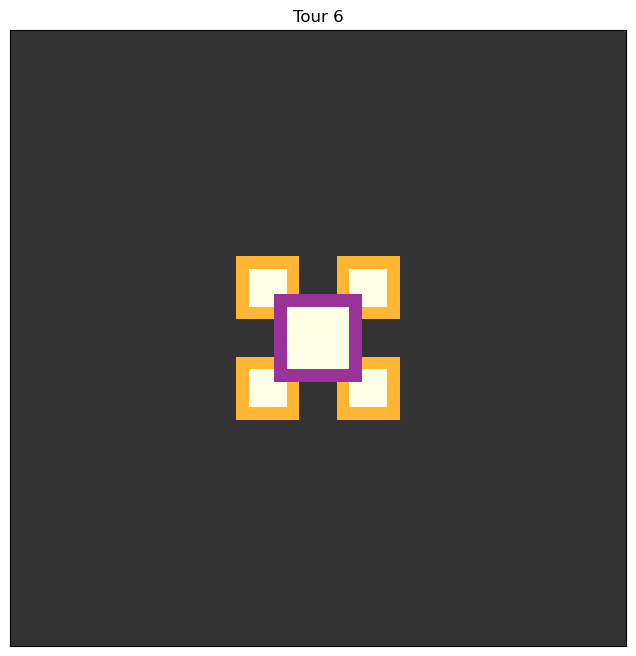

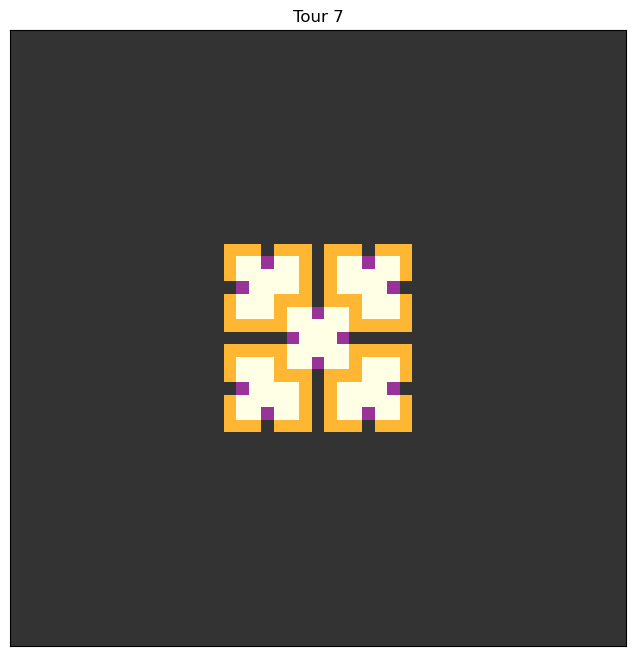

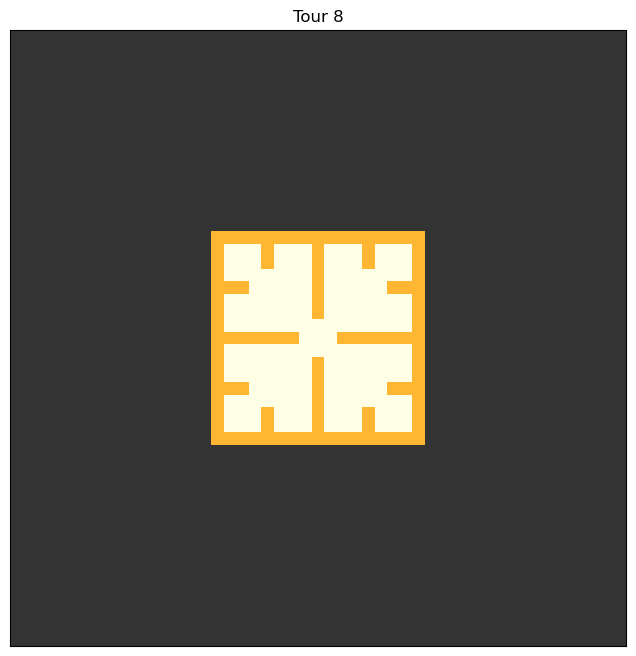

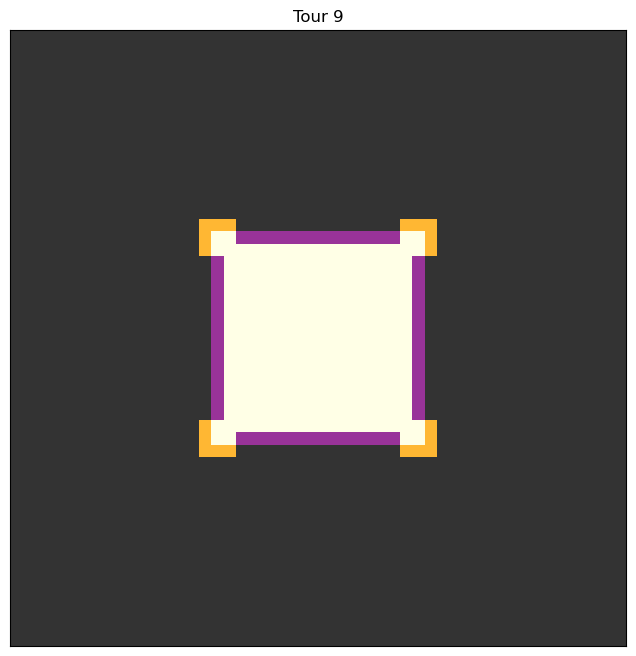

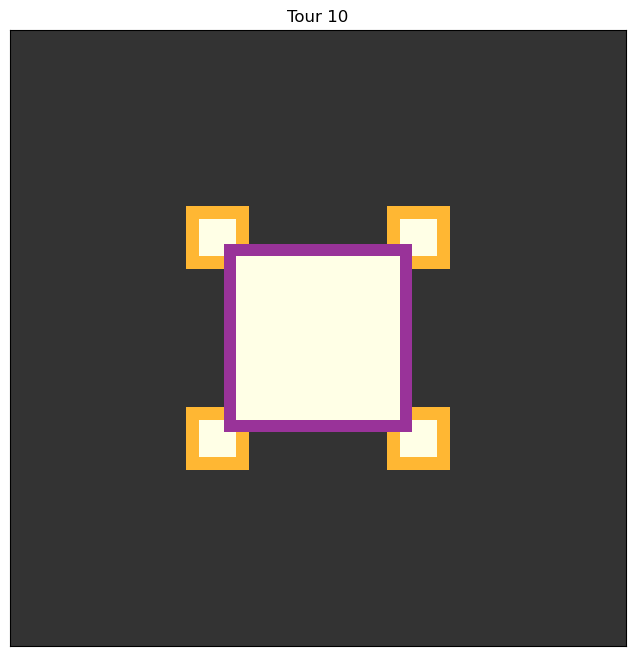

In [13]:
# Définir les paramètres du jeu 

# Définir le nombre de tours
nbrTour = 10

# Définir le tour où commence l'affichage
firstStep = 0

# Définir la taille de la grille 
size = 49

# Définir la taille du dessin
drawSize = 8

# Définir la valeur de la récompense b
b = 1.85

# Définir si on veut que le plateau de jeu soit fini ou infini (si on prend en compte ou non les bords)
# 0 = fini
# 1 = infini
infinite = 0

# Définir si on veut activer le mode kaléidoscope ou non
# 0 = Désactivé
# 1 = Activé
kaleidoscope = 1

jeu(nbrTour, firstStep, drawSize, infinite, kaleidoscope)